In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import Image
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline


In [6]:
# DSND colors: UBlue, Salmon, Gold, Slate
plot_colors = ['#02b3e4', '#ee2e76', '#ffb613', '#2e3d49']

# Light colors: Blue light, Salmon light
plot_lcolors = ['#88d0f3', '#ed8ca1', '#fdd270']

# Gray/bg colors: Slate Dark, Gray, Silver
plot_grays = ['#1c262f', '#aebfd1', '#fafbfc']

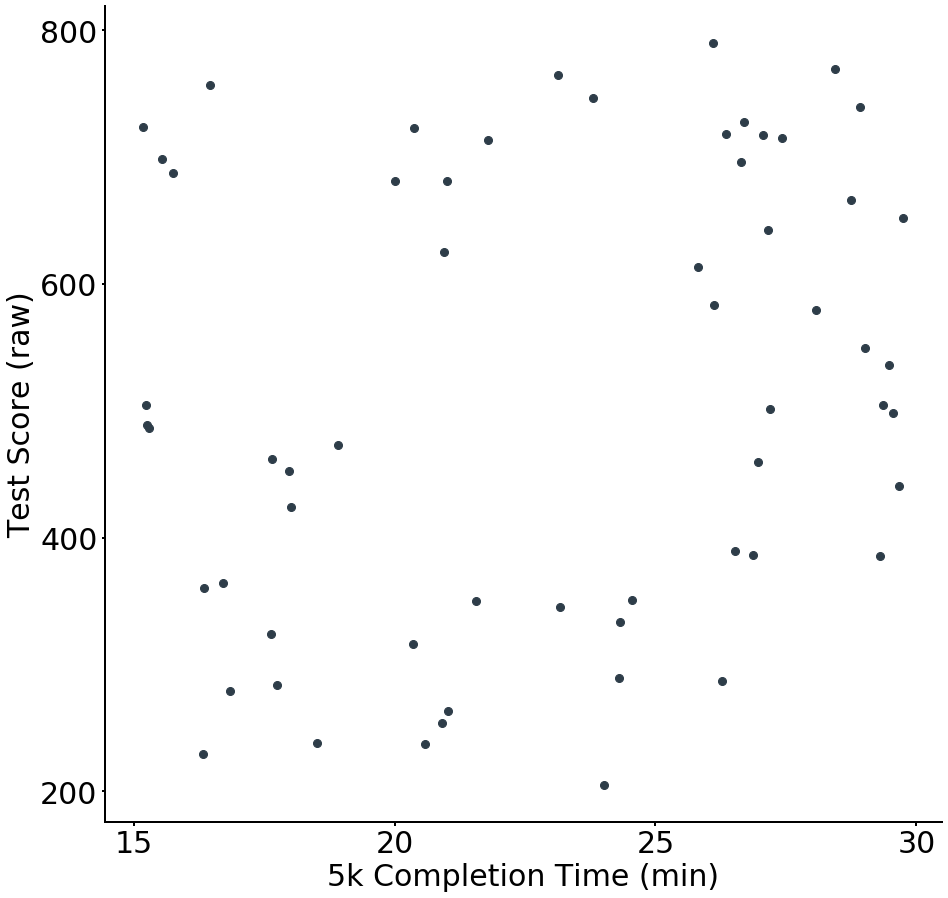

In [9]:
def create_data():
    n_points=120
    X=np.random.RandomState(320000).uniform(-3,3,[n_points, 2])
    X_abs = np.absolute(X)
    inner_ring_flag = np.logical_and(X_abs[:,0] < 1.2, X_abs[:,1] < 1.2)
    outer_ring_flag = X_abs.sum(axis = 1) > 5.3
    keep = np.logical_not(np.logical_or(inner_ring_flag, outer_ring_flag))
    X = X[keep]
    X = X[:60] # only keep first 100
    X1 = np.matmul(X, np.array([[2.5, 0], [0, 100]])) + np.array([22.5, 500])
    plt.figure(figsize = [15,15])
    plt.scatter(X1[:,0], X1[:,1], s = 64, c = plot_colors[-1])

    plt.xlabel('5k Completion Time (min)', size = 30)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
    plt.ylabel('Test Score (raw)', size = 30)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    plt.savefig('C18_FeatScalingEx_01.png', transparent = True)
    
    
    data = pd.DataFrame(X1)
    data.columns = ['5k_Time', 'Raw_Test_Score']
    
    return data

data = create_data()
    
    

`1.` Take a look at the dataset.  Are there any missing values?  What is the average completion time?  What is the average raw test score?  Use the cells below to find the answers to these questions, and the dictioonary to match values and check against our solution.

In [10]:
data.head()

,5k_Time,Raw_Test_Score
0,27.054565,717.555022
1,26.871397,386.046203
2,26.525365,389.550559
3,27.162891,642.335265
4,15.254632,488.573859


In [11]:
data.isnull().sum()

5k_Time           0
Raw_Test_Score    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
5k_Time           60 non-null float64
Raw_Test_Score    60 non-null float64
dtypes: float64(2)
memory usage: 1.1 KB


In [13]:
data.describe()

,5k_Time,Raw_Test_Score
count,60.000000,60.000000
mean,22.845341,511.205699
std,4.854047,179.020607
min,15.174944,205.278415
25%,18.001849,350.650179
50%,23.491192,500.107880
75%,26.987438,690.002347
max,29.749366,789.749215


In [14]:
print('The average completion time is {:.3f}'.format(np.average(data['5k_Time'])))
print('The average raw test score is {:.3f}'.format(np.average(data['Raw_Test_Score'])))


The average completion time is 22.845
The average raw test score is 511.206


`2.` Now, instantiate a kmeans `model` with 2 cluster centers.  Use your model to `fit` and `predict` the the group of each point in your dataset.  Store the predictions in `preds`.  If you correctly created the model and predictions, you should see a top (blue) cluster and bottom (pink) cluster when running the following cell.

In [15]:
n_clusters=2
model=KMeans(n_clusters)
preds=model.fit_predict(data)

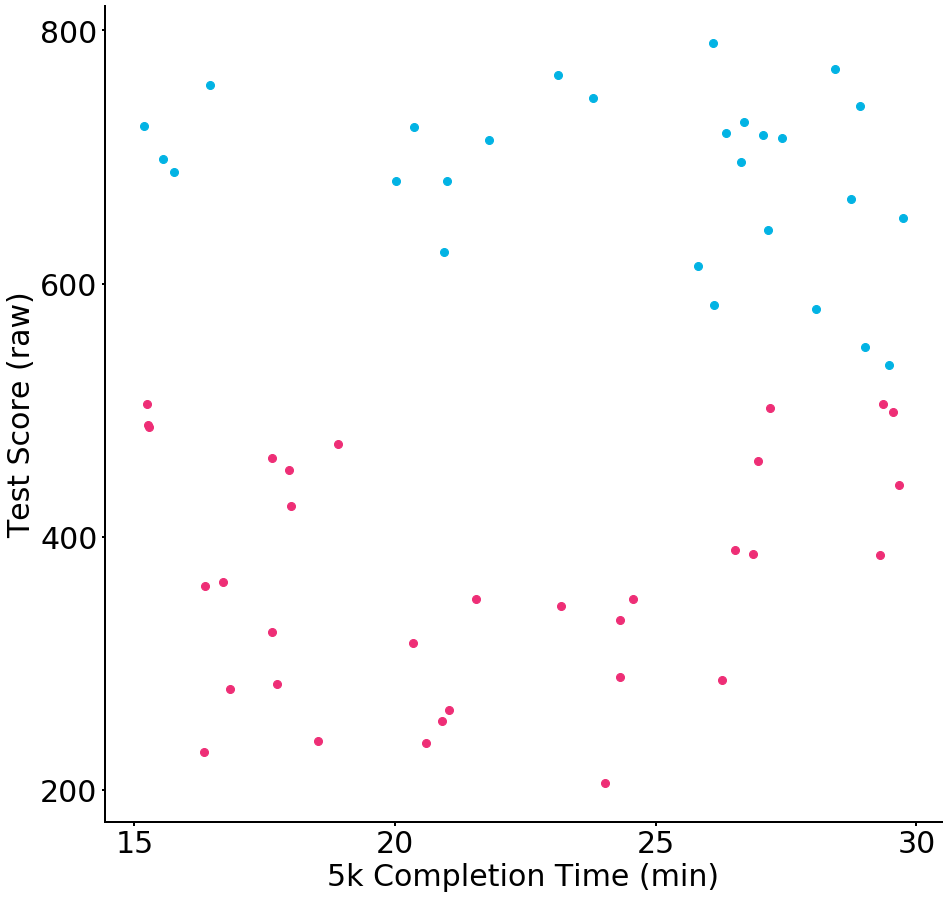

In [16]:
def plot_clusters(data, preds):
    plt.figure(figsize = [15,15])

    for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
        my_members = (preds == k)
        plt.scatter(data['5k_Time'][my_members], data['Raw_Test_Score'][my_members], s = 64, c = col)

    plt.xlabel('5k Completion Time (min)', size = 30)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
    plt.ylabel('Test Score (raw)', size = 30)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    
plot_clusters(data, preds)

`3.` Now create two new columns to add to your `data` dataframe.  The first is `test_scaled`, which you should create by subtracting the mean test score and dividing by the standard deviation test score.  

The second column to create is `5k_time_sec`, which should have the minutes changed to seconds.

In [19]:
data['test_scaled']=(data['Raw_Test_Score']-np.mean(data['Raw_Test_Score']))/np.std(data['Raw_Test_Score'])

In [20]:
data['5k_time_sec']=data['5k_Time']*60

`4.` Now, similar to what you did in question 2, instantiate a kmeans `model` with 2 cluster centers.  Use your model to `fit` and `predict` the the group of each point in your dataset.  Store the predictions in `preds`.  If you correctly created the model and predictions, you should see a right (blue) cluster and left (pink) cluster when running the following cell.

In [21]:
n_clusters=2
model=KMeans(n_clusters=n_clusters)
preds=model.fit_predict(data)

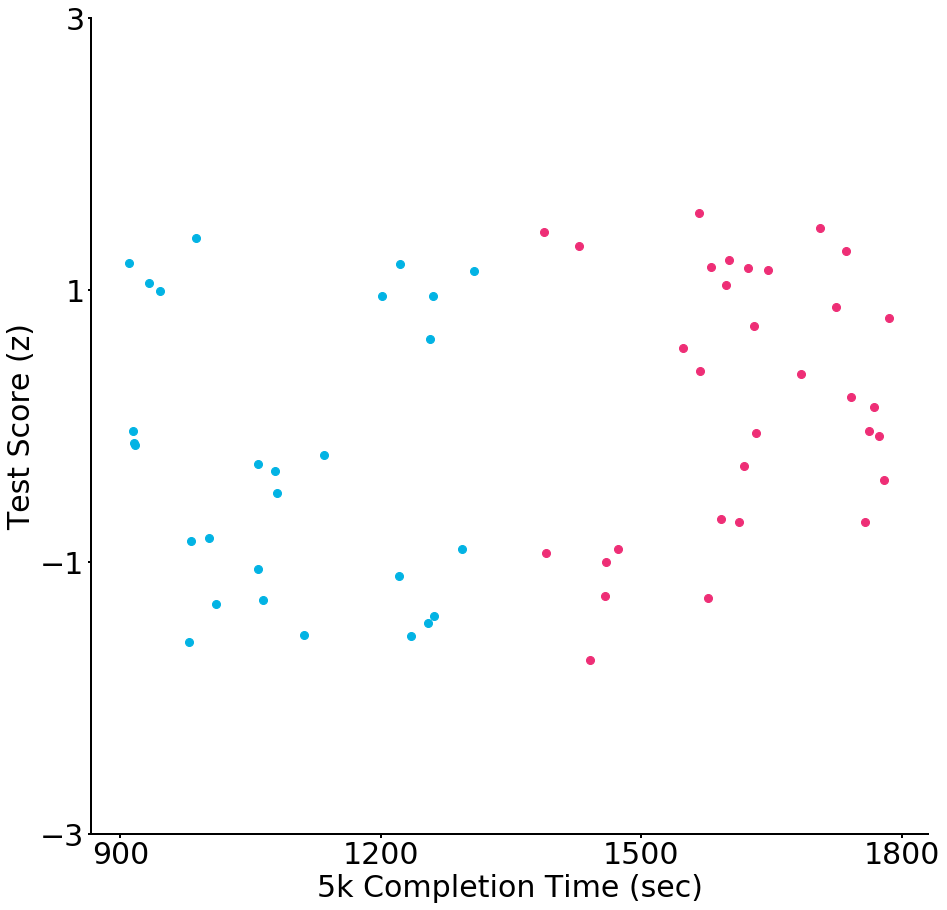

In [22]:
# Run this to see your results

def plot_clusters2(data, preds):
    plt.figure(figsize = [15,15])

    for k, col in zip(range(n_clusters), plot_colors[:n_clusters]):
        my_members = (preds == k)
        plt.scatter(data['5k_time_sec'][my_members], data['test_scaled'][my_members], s = 64, c = col)

    plt.xlabel('5k Completion Time (sec)', size = 30)
    plt.xticks(np.arange(900, 1800+300, 300), fontsize = 30)
    plt.ylabel('Test Score (z)', size = 30)
    plt.yticks(np.arange(-3, 3+2, 2), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    
plot_clusters2(data, preds)